In [3]:

#On importe les librairies
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [4]:
df = pd.read_csv('df_train.csv')

In [5]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_INSTALLMENT_LATE,PAYMENT_DISCREPANCY,SK_ID_CURR_CNT_BUREAU,SK_ID_CURR_CNT_CRED_CARD,SK_ID_CURR_CNT_POS_CASH,SK_ID_CURR_CNT_INSTALL
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,-295.00000,-315.42105,11559.2470,11559.2470,20.421053,0.00000,8.00000,37.280347,19.0,19.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,-1378.16000,-1385.36000,64754.5860,64754.5860,7.200000,0.00000,4.00000,37.280347,28.0,25.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,-754.00000,-761.66670,7096.1550,7096.1550,7.666666,0.00000,2.00000,37.280347,4.0,3.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,-252.25000,-271.62500,62947.0900,62947.0900,19.375000,0.00000,5.55152,6.000000,21.0,16.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,-1028.60610,-1032.24240,12666.4440,12214.0600,3.636364,452.38434,1.00000,37.280347,66.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310330,0,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,...,-120.00000,-156.28572,7492.9243,7492.9243,36.285713,0.00000,5.55152,37.280347,9.0,7.0
310331,0,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,...,-2391.00000,-2393.66670,10069.8670,10069.8670,2.666667,0.00000,5.55152,37.280347,7.0,6.0
310332,0,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,...,-2373.00000,-2387.71440,4399.7080,4115.9150,14.714286,283.79250,4.00000,37.280347,17.0,14.0
310333,1,0,0,0,1,0,171000.0,370107.0,20205.0,319500.0,...,-142.26315,-161.26315,10239.8320,10239.8320,19.000000,0.00000,1.00000,37.280347,20.0,19.0


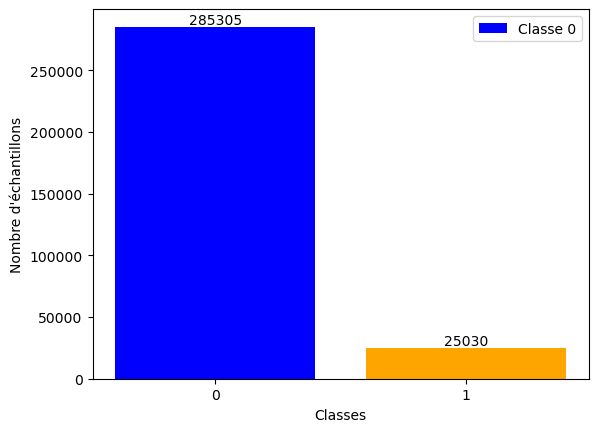

In [8]:


# Compter le nombre d'échantillons par classe
class_counts = df['TARGET'].value_counts()

# Définir les couleurs des classes
colors = ['blue', 'orange']

# Afficher la répartition des classes
plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel('Classes')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(class_counts.index)

# Personnaliser les couleurs des barres
for i, count in enumerate(class_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black')

# Afficher la légende des couleurs
plt.legend(['Classe 0', 'Classe 1'])

plt.show()


In [5]:
df.isnull().sum()

TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
                           ..
PAYMENT_DISCREPANCY         0
SK_ID_CURR_CNT_BUREAU       0
SK_ID_CURR_CNT_CRED_CARD    0
SK_ID_CURR_CNT_POS_CASH     0
SK_ID_CURR_CNT_INSTALL      0
Length: 213, dtype: int64

NameError: name 'show' is not defined

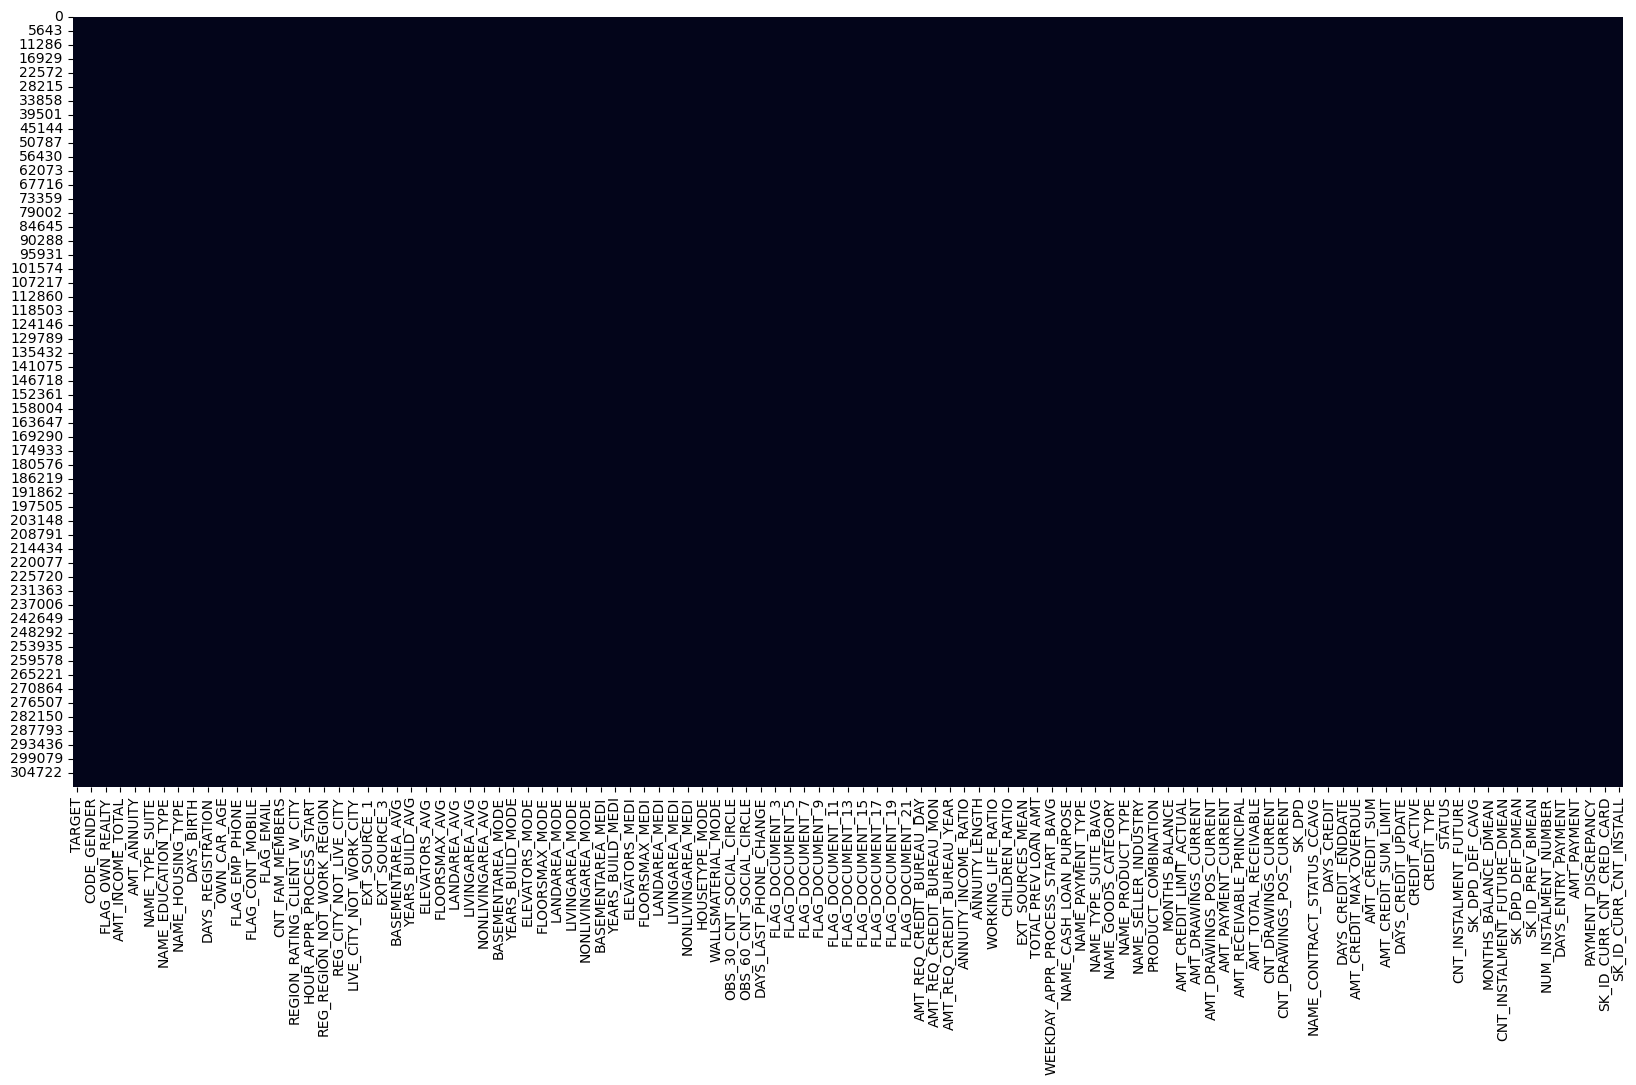

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.notna(), cbar=False)
show()

## Smote

In [9]:
from imblearn.over_sampling import SMOTE

# Séparer les variables prédictives (X) et la variable cible (y)
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Appliquer SMOTE
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X, y)


## Grid search CV

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [13]:
# Exemple d'échantillonnage aléatoire pour réduire la taille de X et y
sample_size = 1000  # Nombre d'échantillons souhaité
random_sample = df.sample(n=sample_size, random_state=1)
X = random_sample.drop('TARGET', axis=1)
y = random_sample['TARGET']


In [9]:
#X = df.drop('TARGET', axis = 1)
#y = df['TARGET']

In [14]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [15]:
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=-1,cv=crossvalidation)

In [16]:
search.fit(X,y)
search.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [17]:
search.best_score_

0.9129999999999999